# <center>ASTR4004/8004 - Neural Networks - Part 3</center>

This notebook builds a neural network from using exisiting framework such as `pytorch` or `tensorflow`.

We will use convolutional layers to recognize handwritten digits from the Modified National Institute of Standards and Technology database (i.e., [MNIST dataset](http://yann.lecun.com/exdb/mnist/))

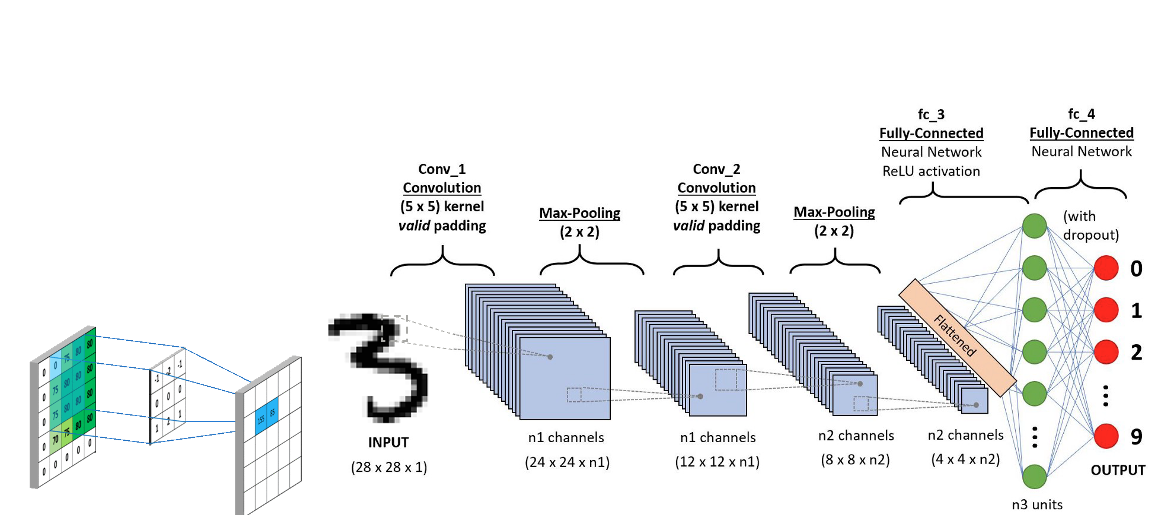

## Useful packages

In [ ]:
# Let's work within our working directory, e.g., where MNIST data is stored
import os
os.chdir('...')

# We need numpy to handle data and array
import numpy as np

# We need matplotlib.pyplot to make plots
import matplotlib.pyplot as plt

# tensorflow and its keras API provides a NN framework
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# set hyperparameters at the beginning
l_rate = 0.1
Nepoch = 20
batch_size = 64

## Dataset preparation
MNIST contains 70,000 images of handwritten digits, in greyscale with pixel-values from 0 to 255. Let us first load the data. I have store them in two seperated numpy files.

In [ ]:
# load data
images = np.load('./MNIST_images.npy', allow_pickle=True)
labels = np.load('./MNIST_labels.npy', allow_pickle=True)

# it is normally a good practice to rescale the training data into [0, 1] or [-1, 1]
images = (images - np.min(images)) / (np.max(images) - np.min(images))

x = ...
# create a one-hot encoding of the labels of size 10, i.e., #
# when label is 1, the array is [1, 0, 0, ..., 0]
# when label is 2, the array is [0, 1, 0, ..., 0]
# ...
# when label is 9, the array is [0, 0, 0, ..., 9]
y = np.array(labels.astype('int32')[:, None] == np.arange(10), dtype=np.float32)

### Let's divide the sample into training (90%) and test (10%) 

In [ ]:
train_size = int(0.9 * len(x)) # tensorflow can split some from training set for validation
test_size = len(x) - train_size

x_train, x_test = x[:train_size], x[test_size:]
y_train, y_test = y[:train_size], y[test_size:]
images_test, labels_test = images[test_size:], labels[test_size:]

print("Training data: {} {}".format(x_train.shape, y_train.shape))
print("Test data: {} {}".format(x_test.shape, y_test.shape))

### It is often a good practice to reshuffle the training set to get rid of any existing pattern in the data

In [ ]:
shuffle_index = np.random.permutation(train_size)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]
shuffle_index = np.random.permutation(test_size)
x_test, y_test = x_test[shuffle_index], y_test[shuffle_index]

## Network definition

In [ ]:
# Define the CNN model
model = keras.Sequential([
    ...
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Display the model's architecture
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy')

# Train the model
history = model.fit( x_train, y_train, epochs=Nepoch, batch_size=batch_size,
            validation_split=0.2,use_multiprocessing = True, workers=12 )

### Let's view the loss

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(history.history['loss'], label='Train Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.legend(loc='upper right')

### and performance

In [ ]:
num_col = 8
fig, axes = plt.subplots(2, num_col, figsize=(num_col*2,5))
output = model.predict(x_test[:num_col])

for i in range(num_col):
    ax = axes[1,i]
    ax.imshow(images_test[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(0.1,0.1, labels_test[i], va='bottom', ha='left', transform=ax.transAxes, color='r')
    axp = axes[0,i]
    axp.bar(np.arange(10), output[i])
    axp.set_xticks(np.arange(10))
    axp.set_yticks([])
    axp.set_ylim(0,0.8)
axes[0,0].set_ylabel('Probability')